<a href="https://colab.research.google.com/github/ulloa2000/pdsei-2023-jose-ulloa/blob/main/Practica_02_PDSeI__Filtros_promedio_movil_y_gaussiano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)


###**2.1. Importación de Librerías y creación de la señal de prueba**

* **Librerias a utilizar:**



**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 2: Filtros media movil / filtro gaussiano
```
**Integrantes:**
```
QUEVEDO PAREDES CARLOS
```
```
ULLOA PINILLOS JOSE
```

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import IPython
from scipy import signal

import soundfile
from google.colab import files
plt.style.use(['dark_background'])

* **Creacion de una señal con ruido**

In [115]:
load=files.upload()

Saving audio2.wav to audio2.wav


In [117]:
IPython.display.Audio(load['audio2.wav'])

In [119]:
audio_signal, samplerate = soundfile.read('audio2.wav')

* **Mostrando señales generadas:**

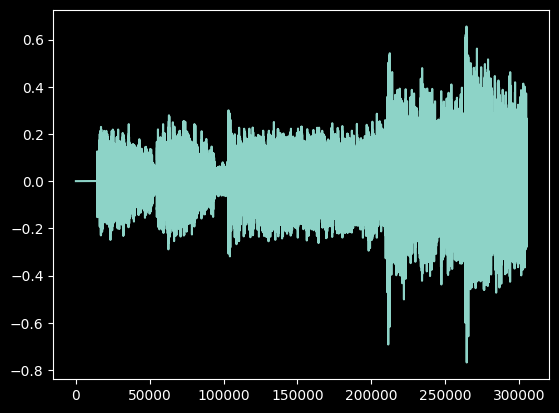

In [120]:
plt.plot(audio_signal)

### **2.2. Filtro media movil**

* **Estructura del filtro:**

![promedio movil.png](https://i.ibb.co/qgv7gP5/promedio-movil.png=100x20)

* **Mas referencias teóricas: **
1. [Media Movil](https://es.wikipedia.org/wiki/Media_m%C3%B3vil)
2. Consultar el libro [2] de la bibliografia del curso en la pagina 38.



* **Aplicación del filtro media movil:**

In [121]:
ventana_size = 100
ventana = np.ones(ventana_size) / ventana_size
audio_filtrado = np.convolve(audio_signal, ventana, mode='same')

* **Gráficas de los resutados:**

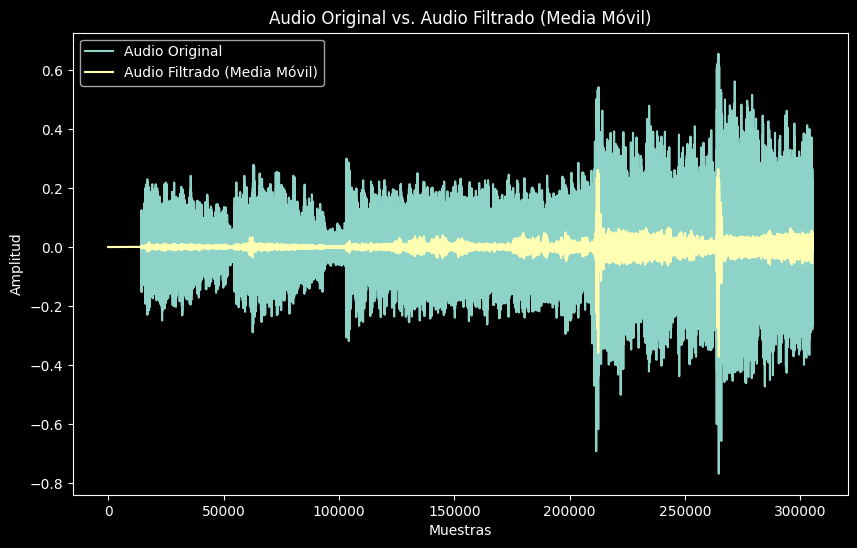

In [122]:
soundfile.write('audio_filtrado_media_movil.wav', audio_filtrado, samplerate)
# Graficar el audio original y el filtrado
plt.figure(figsize=(10, 6))
plt.plot(audio_signal, label='Audio Original')
plt.plot(audio_filtrado, label='Audio Filtrado (Media Móvil)')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Audio Original vs. Audio Filtrado (Media Móvil)')
plt.show()
IPython.display.Audio('audio_filtrado_media_movil.wav')






**2.3. Filtro Gaussiano**

* **Ecuacion para creacion del filtro:**

![Ecuacion Gaussiana](https://i.ibb.co/QCJZ27n/gauss-filter.png)


* **Referencias teoricas:**
1. [Filtro Gaussiano](https://en.wikipedia.org/wiki/Gaussian_filter)

2. [FWHM](https://https://en.wikipedia.org/wiki/Full_width_at_half_maximum#:~:text=In%20a%20distribution%2C%20full%20width,half%20of%20its%20maximum%20value.&text=If%20the%20FWHM%20of%20a,be%20integrated%20by%20simple%20multiplication.)

* **Aplicación del filtro Gaussiano:**

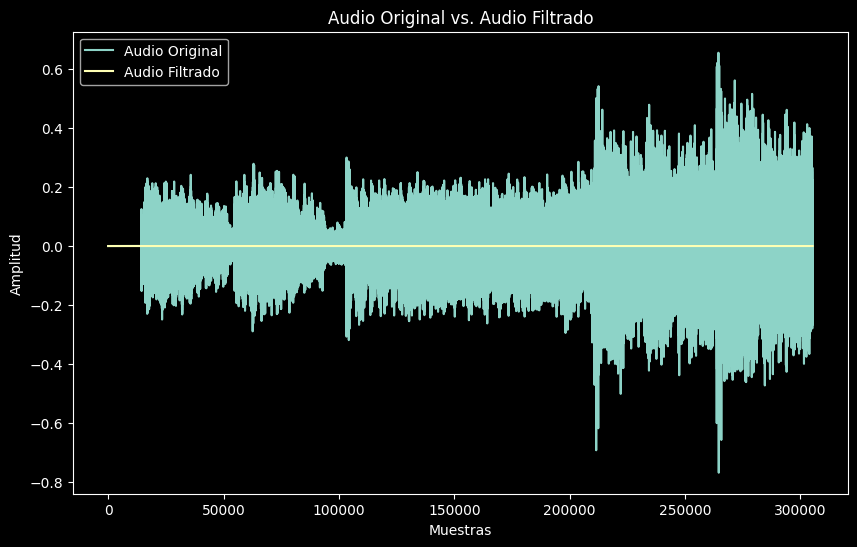

In [126]:
fs = 50
n = 100
k= samplerate

t = np.linspace(-1, 1, 2 * k, endpoint=False)
filtro_gaussiano = np.exp(4*np.log(2)*t**2 / (desviacion_estandar**2))
filtro_gaussiano_normalizado = filtro_gaussiano/np.sum(filtro_gaussiano)

sen_filtrada_gauss = np.zeros_like(audio_signal)

#El orden del filtro es 2*k = 200
for i in range(fs+1,n-fs-1): #Los indices no tienen que salir del rango de la señal
  sen_filtrada_gauss[i] = np.sum(audio_signal[i-fs:i+fs]*filtro_gaussiano_normalizado)
soundfile.write('sen_filtrada_gauss.wav', audio_filtrado, samplerate)

* **Mostrando los resultados:**

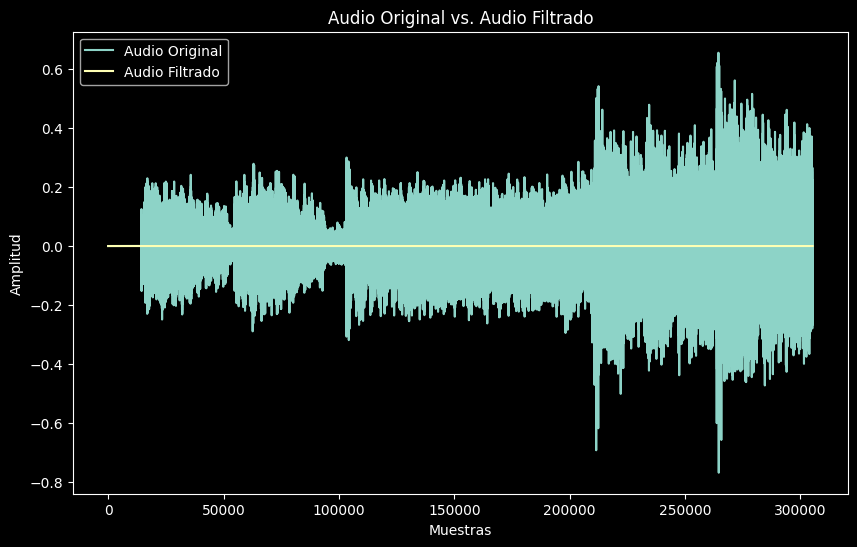

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(audio_signal, label='Audio Original')
plt.plot(sen_filtrada_gauss, label='Audio Filtrado')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Audio Original vs. Audio Filtrado')
plt.show()
IPython.display.Audio('sen_filtrada_gauss.wav')

**2.4 Test de comprobación**

  **2.4.1 ¿Cuál es la diferencia entre una señal estocástica de una señal determinística? Explique.**

   Una señal estocástica es aquella cuyo valor futuro no se puede predecir con exactitud. Por otro lado, una señal determinista es aquella que puede ser representada matemáticamente de forma explícita, y de esta forma sus valores futuros son perfectamente predecibles. Por lo tanto, la señal estocástica se diferencia de la determinística en que es impredecible.

  **2.4.2 ¿Qué es la tasa de muestreo de la señal? Explique.**

La tasa o frecuencia de muestreo es el número de muestras por unidad de tiempo que se toman de una señal continua para producir una señal discreta, durante el proceso necesario para convertirla de analógica en digital. Se mide en Hz (ciclos por segundo). Por ejemplo, una frecuencia de muestreo de 1000 Hz significa que se tomaran 1000 muestras por cada segundo.

  **2.4.3 ¿El filtro media móvil implementado es causal? Explique.** **texto en negrita**

Un filtro es causal si cada efecto en la salida ocurre luego de la causa correspondiente en la entrada. Los filtros causales producen un retardo de la salida respecto a la entrada. Si la respuesta al impulso del filtro es simétrica, el retardo es la muestra del centro de simetría. Por lo tanto, el filtro de media móvil implementado es causal.

**BIBLIOGRAFIA**
Smith, S.W., “The Scientist & Engineer's Guide to Digital Signal Processing”, 1997, California Technical Pub
